c:\Users\Rianne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE: 0.08057401892713095
RMSE: 0.09652705867208262
R²: 0.9995442141639578


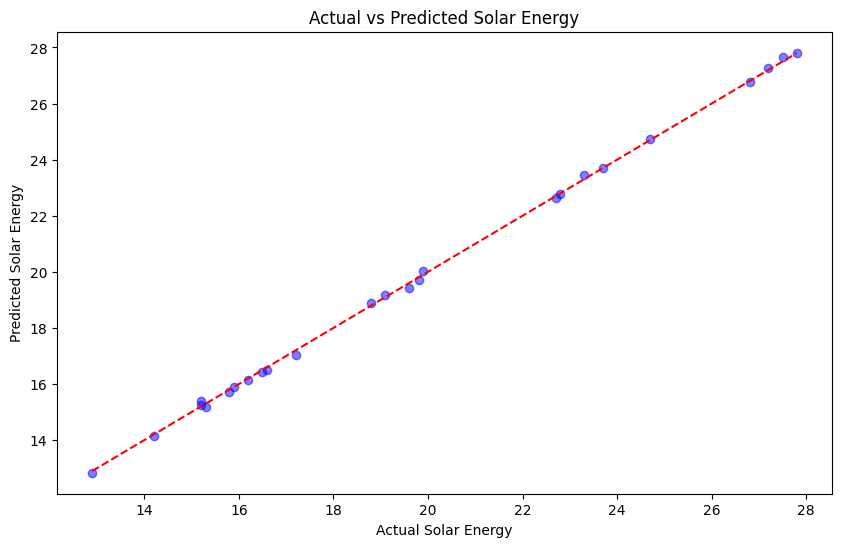

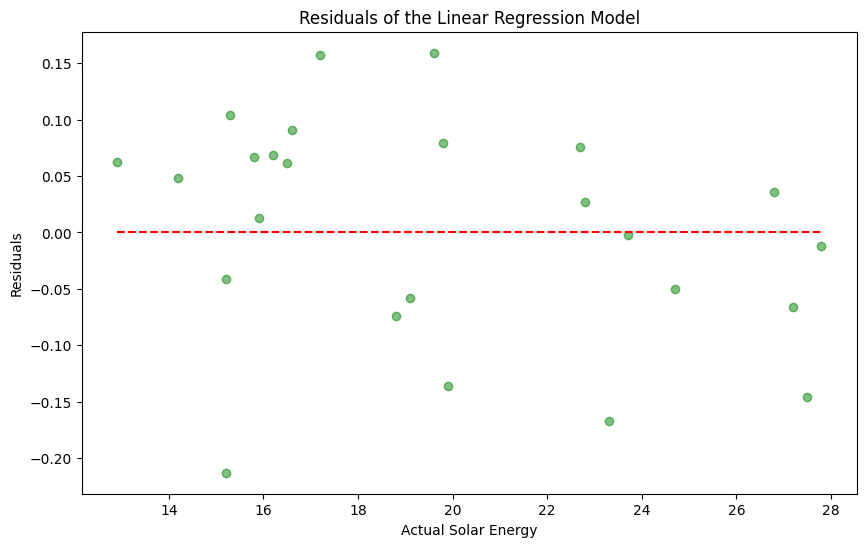

In [ ]:
# IMPORTED LIBRARIES
import pandas as pd                                                             # Used in accessing and reading the dataset
from sklearn.linear_model import LinearRegression                               # The machine learning algorithm
from sklearn.model_selection import train_test_split                            # Training and testing sets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   # Evaluation metrics
import matplotlib.pyplot as plt                                                 # Used for plotting graphs
import numpy as np                                                              # Used for numerical operations

# Loading the dataset
data = pd.read_excel(r'01 - DATASET\01- AUH Weather 2024 [CLEANED].xlsx')

# Selecting the variables and target
X = data[['TEMPERATURE', 'HUMIDITY', 'WIND SPEED', 'SOLAR RADIATION']]
y = data['SOLAR ENERGY'] # -> TARGET

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TRAINING THE MODEL
model_01 = LinearRegression()
model_01.fit(X_train, y_train)

# PREDICTIONS
y_pred = model_01.predict(X_test)

# EVALUATION METRICS
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# VISUALIZATION

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Solar Energy')
plt.xlabel('Actual Solar Energy')
plt.ylabel('Predicted Solar Energy')
plt.show()

# Plotting residuals (difference between actual and predicted values)
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red', linestyle='--')
plt.title('Residuals of the Linear Regression Model')
plt.xlabel('Actual Solar Energy')
plt.ylabel('Residuals')
plt.show()


MAE: 0.0424
RMSE: 0.1017
R²: 0.9996


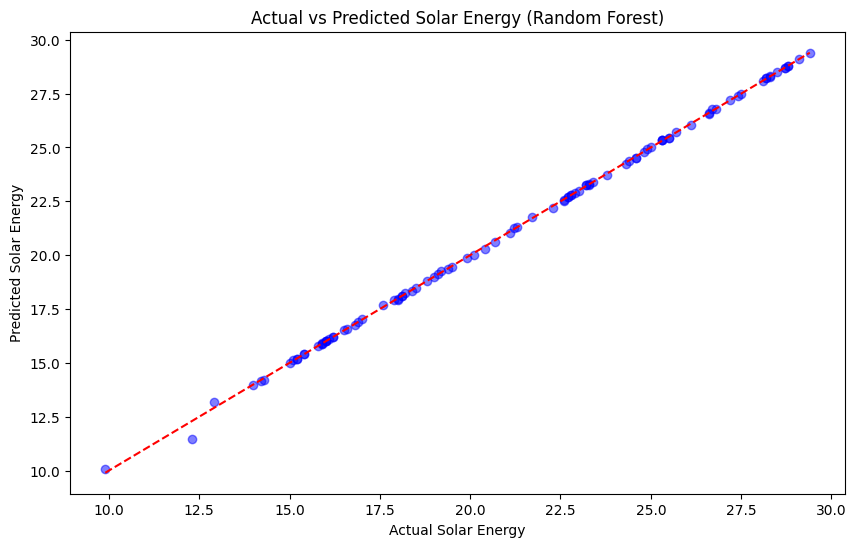

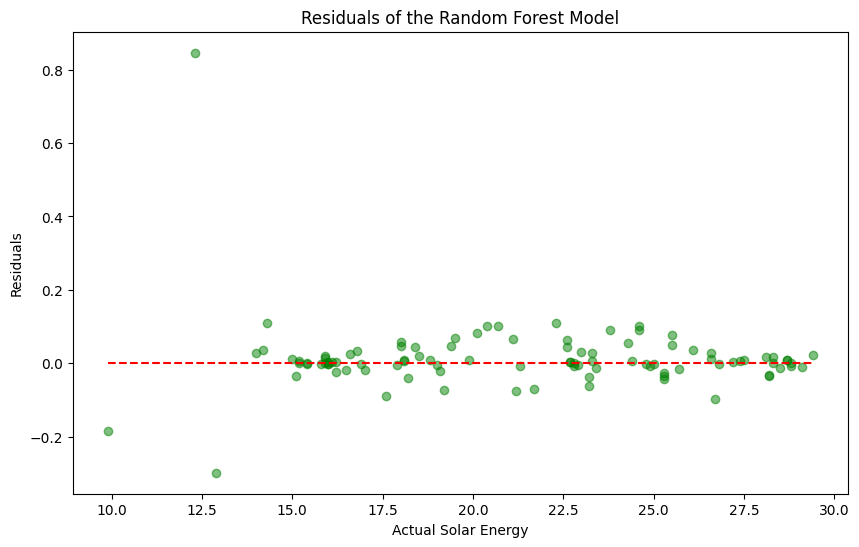

In [ ]:
# IMPORTED LIBRARIES
import pandas as pd                                                             # Used in accessing and reading the dataset
from sklearn.ensemble import RandomForestRegressor                              # The machine learning algorithm
from sklearn.model_selection import train_test_split                            # Training and testing sets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   # Evaluation metrics
import matplotlib.pyplot as plt                                                 # Used for plotting graphs
import numpy as np                                                              # Used for numerical operations

# Loading the dataset
#data = pd.read_excel(r'01 - DATASET\01- AUH Weather 2024 [CLEANED].xlsx')
data = pd.read_excel(r'01 - DATASET\02 - AUH Weather 2023-2024 [CLEANED].xlsx') # Bigger dataset

# Selecting the variables and target
X = data[['TEMP', 'HUMIDITY', 'WIND_SPEED', 'SOLAR_ENERGY']]  # Features
y = data['SOLAR_ENERGY']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TRAINING THE MODEL
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# PREDICTIONS
y_pred = model.predict(X_test)

# PERFORMANCE METRICS
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# VISUALIZATION

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Solar Energy (Random Forest)')
plt.xlabel('Actual Solar Energy')
plt.ylabel('Predicted Solar Energy')
plt.show()

# Plotting residuals (difference between actual and predicted values)
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red', linestyle='--')
plt.title('Residuals of the Random Forest Model')
plt.xlabel('Actual Solar Energy')
plt.ylabel('Residuals')
plt.show()
